# Import required modules

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

In [2]:
tweets_df = pd.read_csv("./First three qtr Dell tweets.csv")
tweets_df.head()

,Datetime,Tweet Id,Text,Username
0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran
1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet
2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett
3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr
4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella


In [3]:
tweets_df.shape

(24970, 4)

In [4]:
print(tweets_df.Text.values[3], "\n\n")
print(tweets_df.Text.values[38])

@dell your customer service is horrible especially agent syedfaisal who has made this experience of purchasing a new computer downright awful and I’ll reconsider ever buying a Dell in the future @DellTech 


@Dell @MichaelDell  u r known for the best in class laptop and hardware and even services. We are sure you will not disappoint. https://t.co/G7ECpgckwF


#### These two tweets very well represent a negative and positive sentiment, respectively.

## Lets see the user with maximun tweets

In [5]:
max_no_of_tweets = tweets_df["Username"].value_counts()[:10]
max_no_of_tweets

johnphillips34     334
jkline120          174
JordanJamesEtem    117
mrlarryridley      111
AiThority          104
solucionetcp        99
jonathanj92389      94
AnsgarTOdinson      79
mikecodemonkey      75
Bradley72901397     56
Name: Username, dtype: int64

# Sentiment Anlaysis using VADER

VADER (Valence Aware Dictionary and sEntiment Reasoner)

* Uses "bag of words" approach
    1. Removes stop words
    2. each word is scored and combined to give a total score
    3. However, this model does not account for the relations between texts


In [6]:
# keeping a tweet from the dataframe as example tweet
example = tweets_df.Text.values[108]
example

"What the hell is up with @Dell DFS site, I can't get it to load and it causes my browsers to go apeshit on CPU. Tried Chrome and Firefox and both have the same effect. Both just warn me that the page is taking to long to load and is slowing the browser down."

Setting up the model

In [12]:
sia_model= SentimentIntensityAnalyzer()
sia_model

In [13]:
# Lets run the model on the example tweet
sia_model.polarity_scores(example)

{'neg': 0.136, 'neu': 0.864, 'pos': 0.0, 'compound': -0.7845}

The model aptly recognises the example as a negative sentiment. Let's apply this model to entire dataset.

In [27]:
res = {}
for i, row in tqdm(tweets_df.iterrows(), total = len(tweets_df)):
    text = row['Text']
    myid = row['Tweet Id']
    res[myid] = sia_model.polarity_scores(text)

100%|██████████| 24970/24970 [00:24<00:00, 1038.76it/s]


In [28]:
# Keeping the results as Dataframe
Vader_res = pd.DataFrame(res).T
Vader_res

,neg,neu,pos,compound
1575991191170342912,0.000,0.875,0.125,0.6461
1575965354425131008,0.000,1.000,0.000,0.0000
1575958171423752203,0.000,0.899,0.101,0.5719
1575939891485032450,0.188,0.812,0.000,-0.7579
1575939359160750080,0.000,1.000,0.000,0.0000
...,...,...,...,...
1477097760931336198,0.087,0.764,0.149,0.5414
1477096631300415496,0.000,0.644,0.356,0.9055
1477091355629432833,0.000,1.000,0.000,0.0000
1477090070830141442,0.000,0.926,0.074,0.2846


Now we need to merge the Vader_res df to our tweets_df, but before that we need a common column

In [29]:
# Reset index (Tweet Id) and rename
Vader_res = Vader_res.reset_index().rename(columns = {'index' : 'Tweet Id'})
Vader_res

,Tweet Id,neg,neu,pos,compound
0,1575991191170342912,0.000,0.875,0.125,0.6461
1,1575965354425131008,0.000,1.000,0.000,0.0000
2,1575958171423752203,0.000,0.899,0.101,0.5719
3,1575939891485032450,0.188,0.812,0.000,-0.7579
4,1575939359160750080,0.000,1.000,0.000,0.0000
...,...,...,...,...,...
24965,1477097760931336198,0.087,0.764,0.149,0.5414
24966,1477096631300415496,0.000,0.644,0.356,0.9055
24967,1477091355629432833,0.000,1.000,0.000,0.0000
24968,1477090070830141442,0.000,0.926,0.074,0.2846


In [30]:
# Join vader_res to the original DataFrame
Vader_res = tweets_df.merge(Vader_res, how = "left")
Vader_res.head(10)

,Datetime,Tweet Id,Text,Username,neg,neu,pos,compound
0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,0.000,0.875,0.125,0.6461
1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,0.000,1.000,0.000,0.0000
2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,0.000,0.899,0.101,0.5719
3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,0.188,0.812,0.000,-0.7579
4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,0.000,1.000,0.000,0.0000
5,2022-09-30 19:49:40+00:00,1575935931969785856,The screenshot is acting up from the website o...,jonathanj92389,0.102,0.833,0.065,-0.2363
6,2022-09-30 19:31:57+00:00,1575931475391746048,@emijuju_ @Alienware @Dell @IntelGaming alien ...,diegoaygo,0.000,1.000,0.000,0.0000
7,2022-09-30 19:25:45+00:00,1575929914888421395,COOKING STREAM DAY!!! Ty to @Alienware for spo...,emijuju_,0.000,0.885,0.115,0.5815
8,2022-09-30 19:07:30+00:00,1575925320070623232,@emijuju_ @Alienware @Dell @intel Beautiful 😍❤️😻,Khurram38256043,0.000,0.562,0.438,0.5994
9,2022-09-30 19:02:37+00:00,1575924090187153416,What's your biggest data management challenge?...,InfoSystems,0.000,0.834,0.166,0.5204


In [31]:
Vader_res.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24970 entries, 0 to 24969
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Datetime  24970 non-null  object 
 1   Tweet Id  24970 non-null  int64  
 2   Text      24970 non-null  object 
 3   Username  24970 non-null  object 
 4   neg       24970 non-null  float64
 5   neu       24970 non-null  float64
 6   pos       24970 non-null  float64
 7   compound  24970 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1.7+ MB


In [32]:
# Lets read a neutral tweet
Vader_res.Text.values[0]

'@Logitech @apple @Google @Microsoft @Dell @Lenovo #WhatIf QWERTY were modified for programmers so things like brackets, parens, quotes, operators, etc. moved to the middle near G-H splitting left/right brackets to separate hands, and relieving the less dextrous pinky finger?'

**Reading the most positive and most negative tweet**

In [34]:
# Get index of the highest compound score
print(Vader_res.index[Vader_res.compound == Vader_res.compound.max()].tolist())

# Get the tweet/text
Vader_res.Text.values[2270]

[2270]


'Celebrating #ICL2022 Awards Winner!\nSuper pumped to announce that @Dell has won it big under the Best Motivational Content on an OTT platform  at the India Content Leadership 2022 Awards. \nWe wish you more transformative success ahead!\n\n#marketing #marketingawards #iclawards https://t.co/KR5ZipPFma'

In [35]:
# Get index of the lowest compound score
print(Vader_res.index[Vader_res.compound == Vader_res.compound.min()].tolist())

# Get the tweet/text
Vader_res.Text.values[4388]

[4388]


'@Dell is DUMB AS HELL! Wtf would yall tell me to email the address to ship my laptop to, I even had a note for the correct address and yall still sent it to the wrong freaking address!!!!!!!!!!!!!!    BEYOND PISSED !!!!!!!!!!'

### Lets create a "Sentiment "col which labels tweets as Positive, Negative and Neutral based on compound score

In [36]:
# Define a function to create labels based on compound score
def Sentiment_label(value):
    if value > 0:
        return "Positive"
    if value == 0:
        return "Neutral"
    if value < 0:
        return "Negative"


Vader_res["Sentiment"] = Vader_res['compound'].map(Sentiment_label)

In [37]:
Vader_res.head(10)

,Datetime,Tweet Id,Text,Username,neg,neu,pos,compound,Sentiment
0,2022-09-30 23:29:15+00:00,1575991191170342912,@Logitech @apple @Google @Microsoft @Dell @Len...,ManjuSreedaran,0.000,0.875,0.125,0.6461,Positive
1,2022-09-30 21:46:35+00:00,1575965354425131008,@MK_habit_addict @official_stier @MortalKombat...,MiKeMcDnet,0.000,1.000,0.000,0.0000,Neutral
2,2022-09-30 21:18:02+00:00,1575958171423752203,"As @CRN celebrates its 40th anniversary, Bob F...",jfollett,0.000,0.899,0.101,0.5719,Positive
3,2022-09-30 20:05:24+00:00,1575939891485032450,@dell your customer service is horrible especi...,daveccarr,0.188,0.812,0.000,-0.7579,Negative
4,2022-09-30 20:03:17+00:00,1575939359160750080,@zacokalo @Dell @DellCares @Dell give the man ...,heycamella,0.000,1.000,0.000,0.0000,Neutral
5,2022-09-30 19:49:40+00:00,1575935931969785856,The screenshot is acting up from the website o...,jonathanj92389,0.102,0.833,0.065,-0.2363,Negative
6,2022-09-30 19:31:57+00:00,1575931475391746048,@emijuju_ @Alienware @Dell @IntelGaming alien ...,diegoaygo,0.000,1.000,0.000,0.0000,Neutral
7,2022-09-30 19:25:45+00:00,1575929914888421395,COOKING STREAM DAY!!! Ty to @Alienware for spo...,emijuju_,0.000,0.885,0.115,0.5815,Positive
8,2022-09-30 19:07:30+00:00,1575925320070623232,@emijuju_ @Alienware @Dell @intel Beautiful 😍❤️😻,Khurram38256043,0.000,0.562,0.438,0.5994,Positive
9,2022-09-30 19:02:37+00:00,1575924090187153416,What's your biggest data management challenge?...,InfoSystems,0.000,0.834,0.166,0.5204,Positive


## Visulize the Sentiments

Text(0, 0.5, 'Number of tweets')

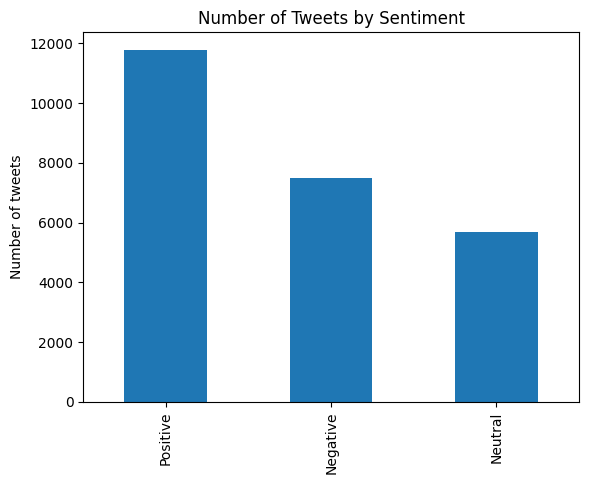

In [38]:
ax = Vader_res.Sentiment.value_counts().plot(kind = 'bar', label = 'ax')
ax.set_title ("Number of Tweets by Sentiment")
ax.set_ylabel ("Number of tweets")

# Lets create a Word Cloud

In [39]:
from wordcloud import WordCloud, STOPWORDS

## Lets create 3 subsets of the data frame 'Vader_res' which contains positive, neutral and negative sentiments separately

In [40]:
# Create 3 subsets
Positive_tweets = Vader_res[Vader_res['Sentiment'] == 'Positive']
Neutral_tweets = Vader_res[Vader_res['Sentiment'] == 'Neutral']
Negative_tweets = Vader_res[Vader_res['Sentiment'] == 'Negative']

In [41]:
# Combine each tweets to for the 3 subsets

combined_pos_text =  ''.join(Positive_tweets.Text)
print("There are {} words in the combination of all positive tweets.\n".format(len(combined_pos_text)))

combined_neu_text =  ''.join(Neutral_tweets.Text)
print("There are {} words in the combination of all neutral tweets.\n" .format(len(combined_neu_text)))

combined_neg_text =  ''.join(Negative_tweets.Text)
print("There are {} words in the combination of all negative tweets.\n" .format(len(combined_neg_text)))

There are 2173661 words in the combination of all positive tweets.

There are 698244 words in the combination of all neutral tweets.

There are 1448753 words in the combination of all negative tweets.



# Looking into the negative side of things

**Basically a company would like to know what's the reason behind negative responses from the customers. So lets create a wordcloud of negative tweets (combined_neg_text)**

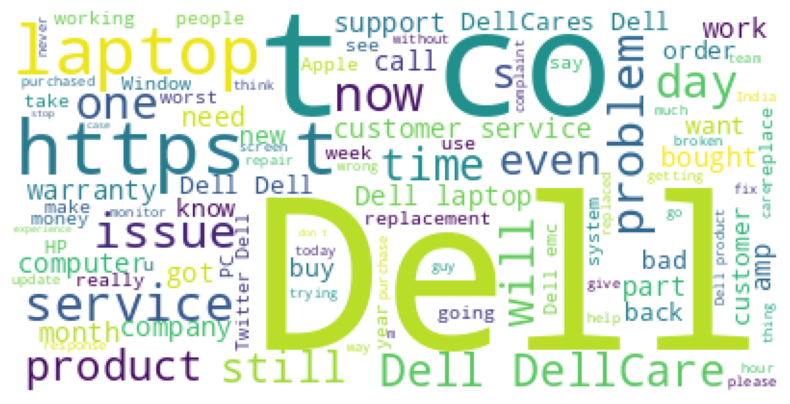

In [42]:
# Create word cloud for negative tweets
stopwords = set(STOPWORDS)
word_cloud = WordCloud(background_color = 'white',
                       stopwords = stopwords,
                       max_words = 100).generate(combined_neg_text)


plt.figure(figsize = (8, 8))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout()

plt.show()


**The word cloud suggest that customers do not seem happy with Dell's costumer service.**

# Lets get a bit positive

A product based company would be equally interested in knowing what's working good for them. So lets look at the positive side:

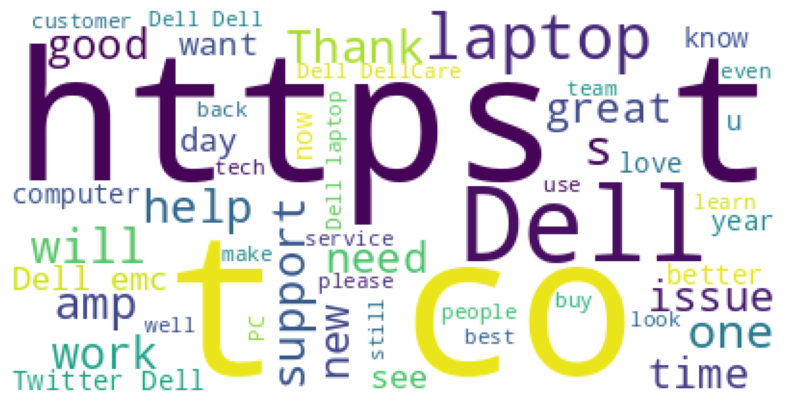

In [43]:
# Create word cloud for positive tweets
word_cloud = WordCloud(background_color = 'white',
                       stopwords = stopwords,
                       max_words = 50).generate(combined_pos_text)


plt.figure(figsize = (8, 8))
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout()

plt.show()